In [206]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\arthu\Desktop\movies.csv')

In [207]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [208]:
# Checking for missing data
# Only changing strg missing data, since changing NaN in numeric columns can lead to outliers
for col in df.columns:
    pct_missing_data = np.mean(df[col].isnull())
    print('{} - {}% - {}'.format(col, pct_missing_data, df[col].dtype))

name - 0.0% - object
rating - 0.010041731872717789% - object
genre - 0.0% - object
year - 0.0% - int64
released - 0.0002608242044861763% - object
score - 0.0003912363067292645% - float64
votes - 0.0003912363067292645% - float64
director - 0.0% - object
writer - 0.0003912363067292645% - object
star - 0.00013041210224308815% - object
country - 0.0003912363067292645% - object
budget - 0.2831246739697444% - float64
gross - 0.02464788732394366% - float64
company - 0.002217005738132499% - object
runtime - 0.0005216484089723526% - float64


In [209]:
rating_rows = df['rating']

# this method doens't show NaN values
rating_rows.value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [210]:
# this one shows all the possible values
rating_rows.unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [211]:
# Replace "Unrated" and "NaN" by "Not Rated"
#rating_rows[rating_rows.isna()]
df = df.replace({'rating': [np.nan, 'Unrated']}, 'Not Rated')

In [212]:
released_column = df['released']
df.loc[released_column.isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [213]:
# Replaces NaN values by 'Not Informed'
df = df.replace({'released': {np.nan: 'Not Informed'}})

In [214]:
df = df.replace({'writer': {np.nan: 'Not Informed'}})

In [215]:
df = df.replace({'star': {np.nan: 'Not Informed'}})

In [216]:
df = df.replace({'country': {np.nan: 'Not Informed'}})

In [217]:
df = df.replace({'company': {np.nan: 'Not Informed'}})

In [218]:
# Checking if df has changed NaN percentages
for col in df.columns:
    pct_missing_data = np.mean(df[col].isnull())
    print('{} - {}% - {}'.format(col, pct_missing_data, df[col].dtype))

name - 0.0% - object
rating - 0.0% - object
genre - 0.0% - object
year - 0.0% - int64
released - 0.0% - object
score - 0.0003912363067292645% - float64
votes - 0.0003912363067292645% - float64
director - 0.0% - object
writer - 0.0% - object
star - 0.0% - object
country - 0.0% - object
budget - 0.2831246739697444% - float64
gross - 0.02464788732394366% - float64
company - 0.0% - object
runtime - 0.0005216484089723526% - float64


In [219]:
pd.set_option('display.max_rows', None)

In [220]:
# Drop any duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


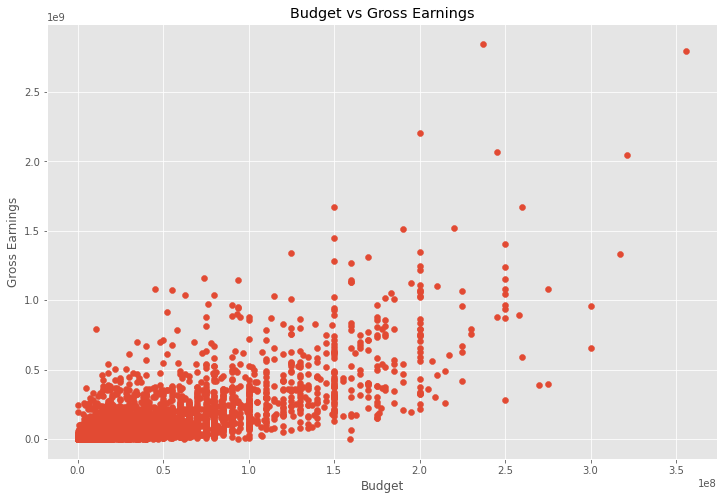

In [221]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

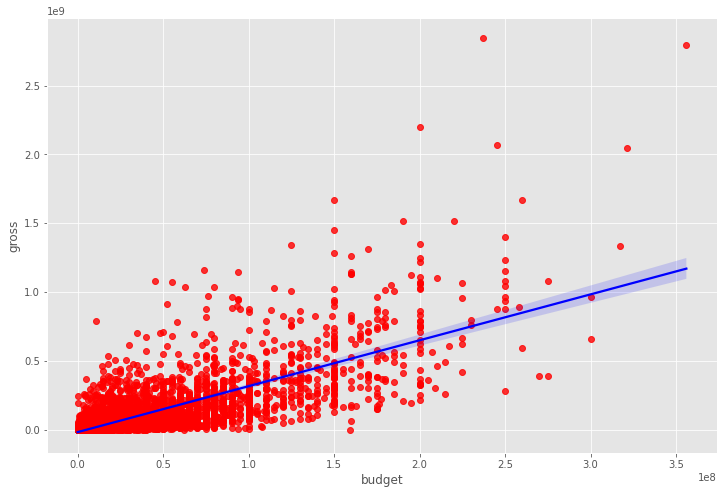

In [222]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [223]:
# looking at correlation
corr = df.corr()
corr.head()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216


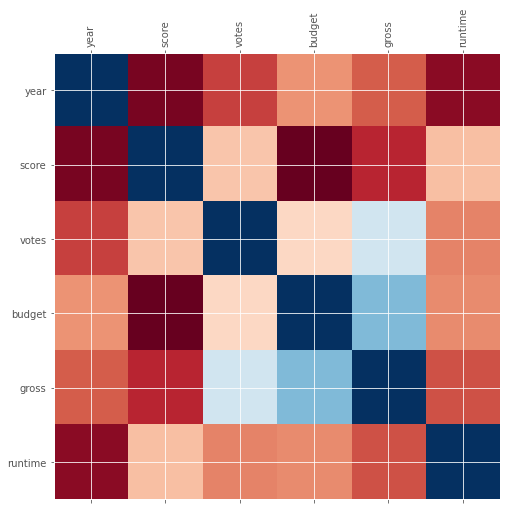

In [224]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

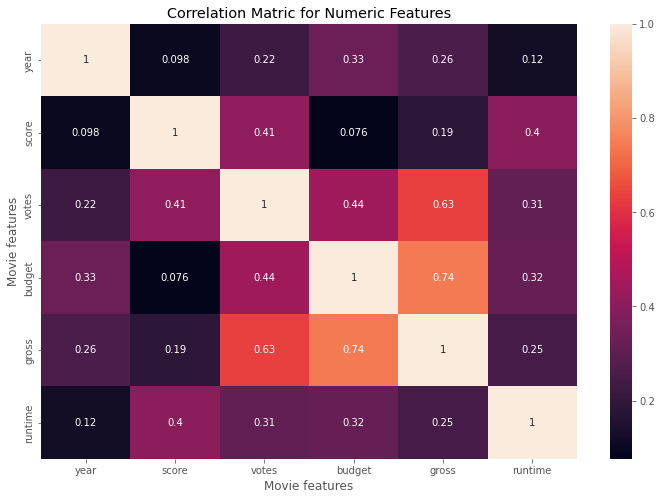

In [225]:
# Two ways of plotting correlation data visually 
sns.heatmap(corr, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [226]:
df_numerized = df

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4015,1047,55,19000000.0,46998772.0,2320,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,56,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,56,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2247,56,3500000.0,83453539.0,1813,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,56,6000000.0,39846344.0,1778,98.0


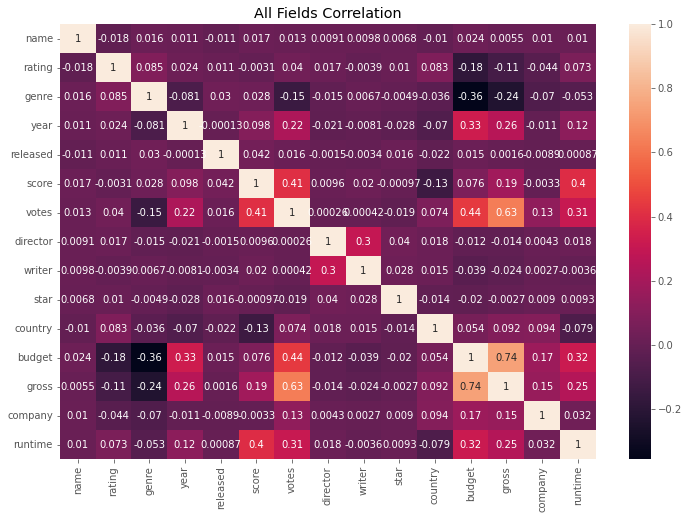

In [227]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('All Fields Correlation')

plt.show()

In [230]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head(20)

name    name        1.000000
        rating     -0.018407
        genre       0.016355
        year        0.011453
        released   -0.010703
        score       0.017097
        votes       0.013088
        director    0.009079
        writer      0.009753
        star        0.006751
        country    -0.010468
        budget      0.023970
        gross       0.005533
        company     0.010122
        runtime     0.010392
rating  name       -0.018407
        rating      1.000000
        genre       0.085199
        year        0.023969
        released    0.011073
dtype: float64

In [231]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.356564
budget  genre    -0.356564
gross   genre    -0.235650
genre   gross    -0.235650
budget  rating   -0.183830
dtype: float64

In [232]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.head()

votes   gross     0.630757
gross   votes     0.630757
budget  gross     0.740395
gross   budget    0.740395
name    name      1.000000
dtype: float64